<a href="https://colab.research.google.com/github/snehasamanta/TSF2/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Created by: SNEHA SAMANTA

#Import important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

#Load the iris dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Check the dimenstions of the data

In [3]:
df.shape

(150, 4)

## The iris dataset has 150 rows and 4 columns

In [4]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check for the missing values

In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## The iris dataset does not contain any missing value

# Check for duplicate values in the dataset

In [9]:
df.duplicated().sum()

1

# Drop the duplicate value

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(149, 4)

# Correlation among the variables

In [12]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


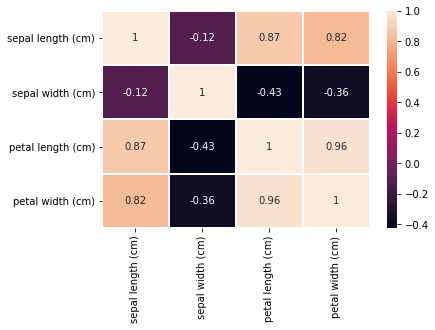

In [13]:
sns.heatmap(df.corr(),linewidths=1,annot=True)

## From the correlation matrix and the heatmap of the whole dataset we can conclude that, there is a strong linear association among the following variables,
- sepal length and petal length, 
- sepal length and petal width and 
- petal length and petal width.

# Line plot for all the variables

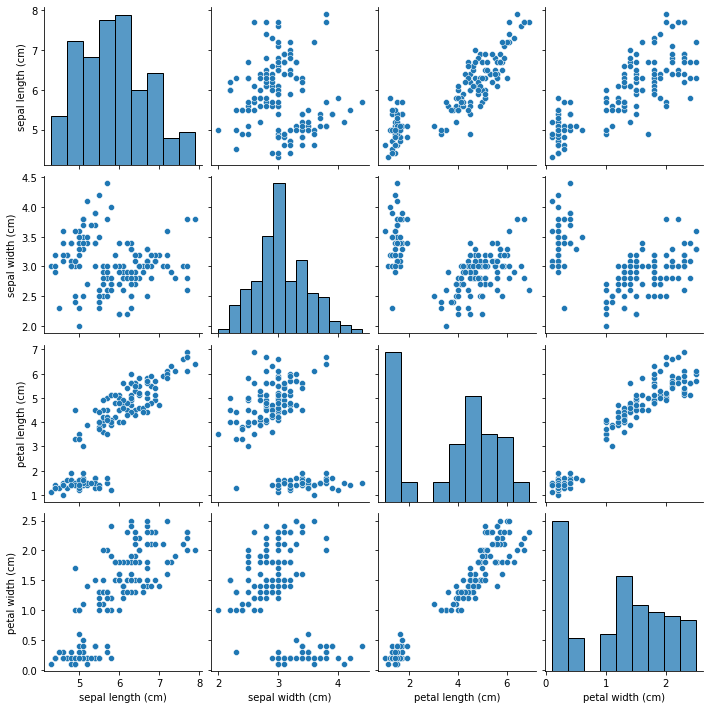

In [14]:
sns.pairplot(df)

- We can see that Species is mainly depend on Petal Length and Petal Width.

# Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the four columns are used, as shown below:

In [15]:
x = df.iloc[:, [0,1,2,3]].values

# Finding the optimum number of clusters for k-means classification

## Elbow Method using within-cluster-sum-of-squares(wcss)

In [16]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
Error    

[678.9328859060404,
 151.9968671383648,
 78.11047368421052,
 56.832953983516475,
 46.00700526315789,
 38.60081045796309,
 34.31144805194805,
 30.34939017504235,
 28.18434110778619]

## Elbow method to find the optimum number of clusters

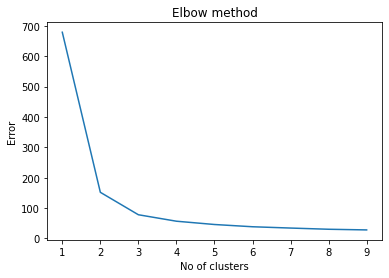

In [17]:
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The shape of an elbow has formed for k=3. Also, after k=3, the error does not decrease significantly.

##Now, we will implement cluster analysis for k=3.

In [18]:
kmeans3=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=0.001)
kmeans3.fit(x)
y_kmeans3=kmeans3.fit_predict(x)
y_kmeans3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# Visualizing the clusters

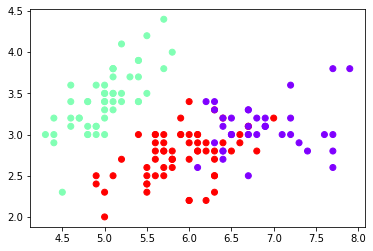

In [19]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')